In [44]:
import pandas as pd

In [45]:
df = pd.read_csv('HR_comma_sep.csv')
# d.set_option('display.max_rows', None)

In [46]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [48]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Check missing values and duplicates

In [49]:
# Check for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [50]:
# Check duplicates
print(df.duplicated().sum())

3008


In [51]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of duplicates:", df.duplicated().sum())
print("df shape:", df.shape)

Number of duplicates: 0
df shape: (11991, 10)


In [52]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Handle non-numeric fields

In [53]:
# One-hot encoding for department
df = pd.get_dummies(df, columns=['department'], drop_first=True, dtype=int)


In [54]:
# Map salary to numeric values
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['salary'] = df['salary'].map(salary_mapping)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_montly_hours    11991 non-null  int64  
 4   time_spend_company      11991 non-null  int64  
 5   Work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary                  11991 non-null  int64  
 9   department_RandD        11991 non-null  int64  
 10  department_accounting   11991 non-null  int64  
 11  department_hr           11991 non-null  int64  
 12  department_management   11991 non-null  int64  
 13  department_marketing    11991 non-null  int64  
 14  department_product_mng  11991 non-null  int

In [56]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [57]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,0.60387,0.057877,0.051789,0.050121,0.036361,0.056125,0.057210,0.270119,0.151864,0.18714
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.63590,0.233520,0.221610,0.218204,0.187194,0.230173,0.232252,0.444040,0.358904,0.39004
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


# Understand what factors contributed most to employee turnover

## Correlation Matrix

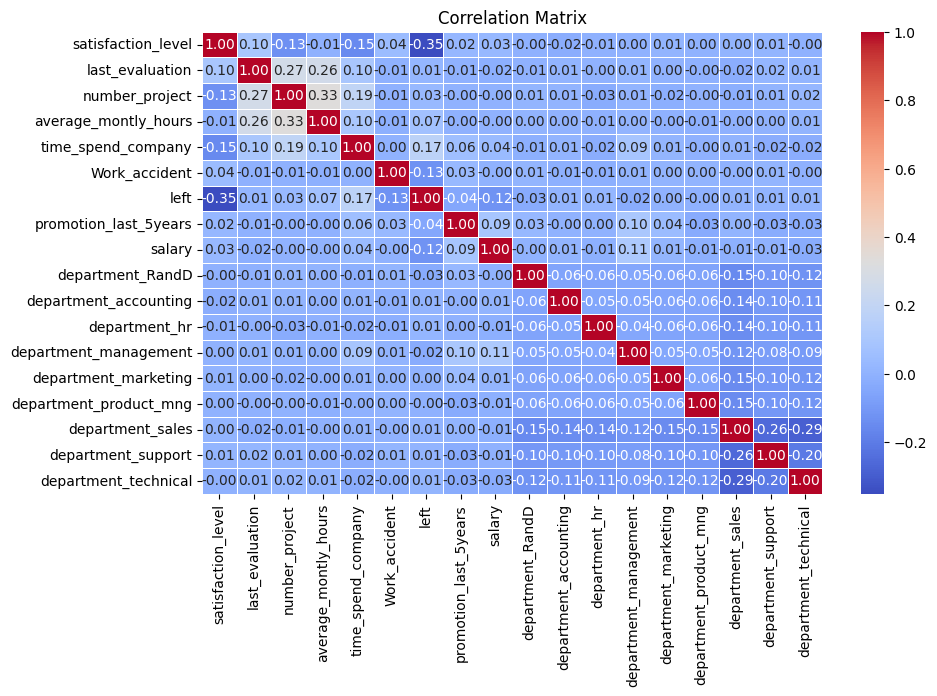

In [58]:
# Heatmap between numerical features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


##  Distrbution plots and bar plots

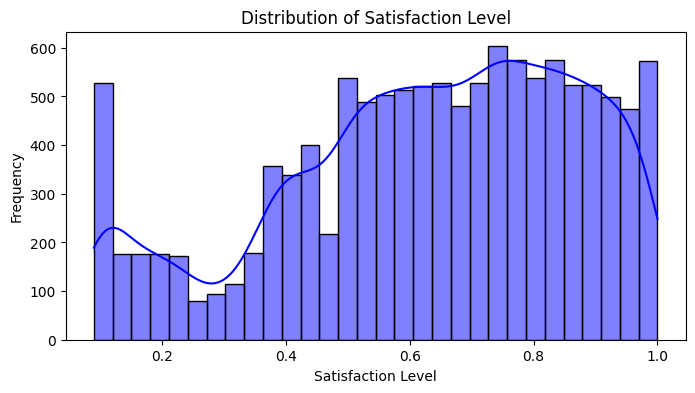

In [59]:
# Distribution plot of satisfaction_level
plt.figure(figsize=(8, 4))
sns.histplot(df['satisfaction_level'], kde=True, bins=30, color='blue')
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

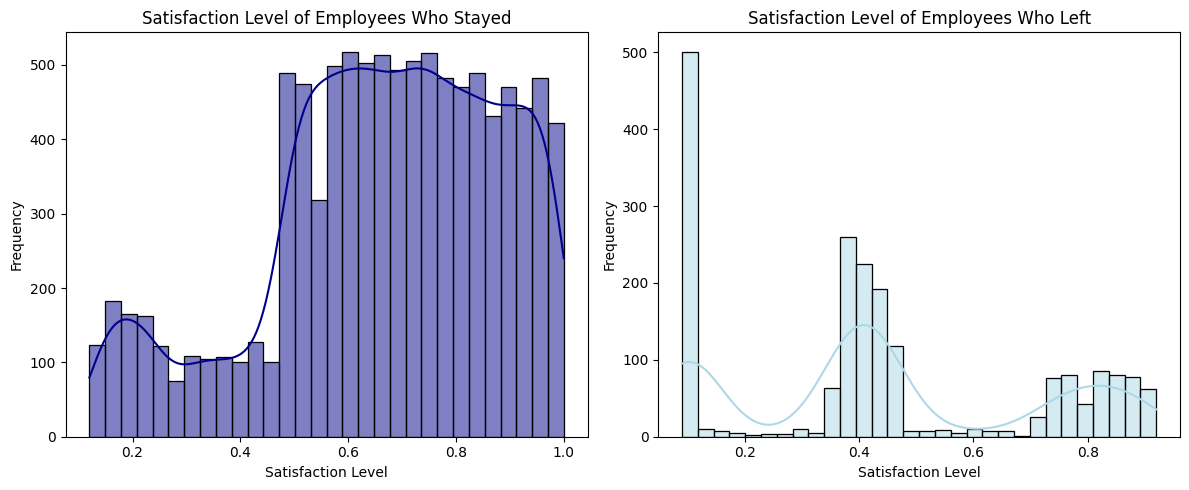

In [60]:
# Distribution plots for satisfaction_level for left and stayed
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['left'] == 0]['satisfaction_level'], kde=True, bins=30, color='darkblue')
plt.title('Satisfaction Level of Employees Who Stayed')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(df[df['left'] == 1]['satisfaction_level'], kde=True, bins=30, color='lightblue')
plt.title('Satisfaction Level of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

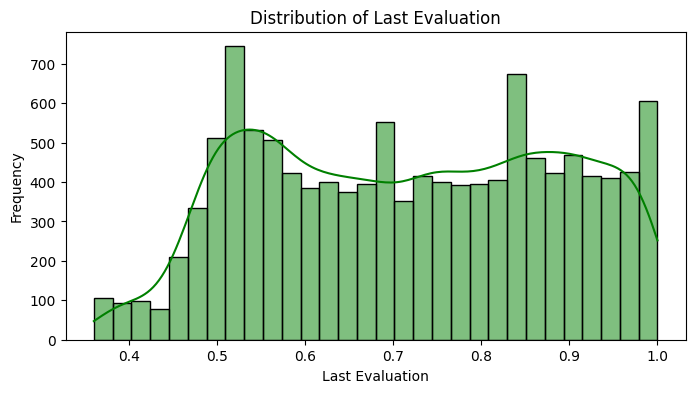

In [61]:
# Distribution plot of last_evaluation
plt.figure(figsize=(8, 4))
sns.histplot(df['last_evaluation'], kde=True, bins=30, color='green')
plt.title('Distribution of Last Evaluation')
plt.xlabel('Last Evaluation')
plt.ylabel('Frequency')
plt.show()

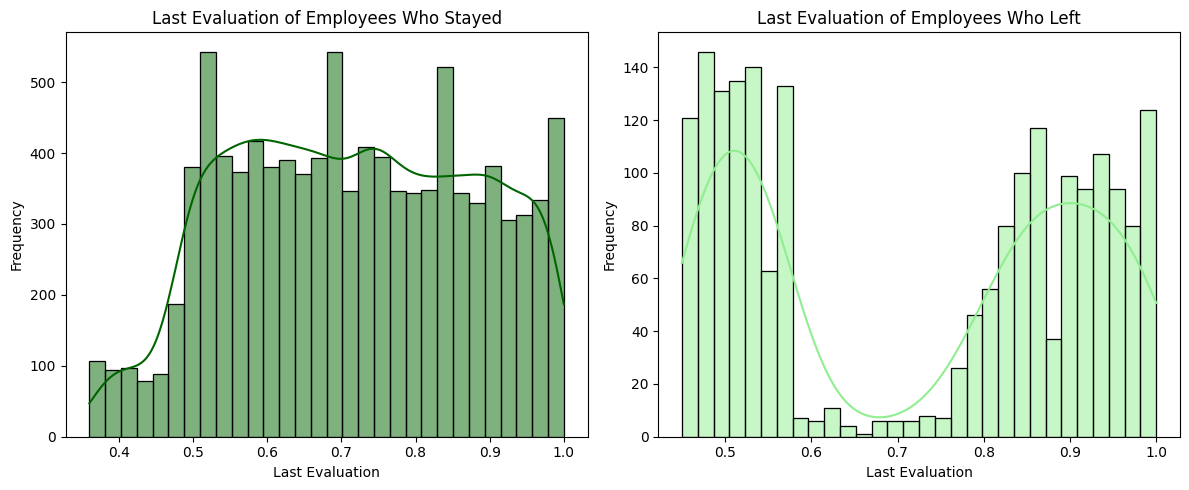

In [62]:
# Distribution plot of last_evaluation for left and stayed
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['left'] == 0]['last_evaluation'], kde=True, bins=30, color='darkgreen')
plt.title('Last Evaluation of Employees Who Stayed')
plt.xlabel('Last Evaluation')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(df[df['left'] == 1]['last_evaluation'], kde=True, bins=30, color='lightgreen')
plt.title('Last Evaluation of Employees Who Left')
plt.xlabel('Last Evaluation')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

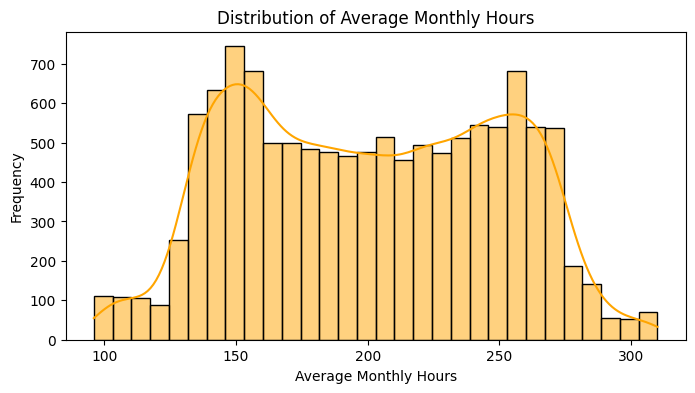

In [63]:
# Distribution plot of average_montly_hours
plt.figure(figsize=(8, 4))
sns.histplot(df['average_montly_hours'], kde=True, bins=30, color='orange')
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.show()

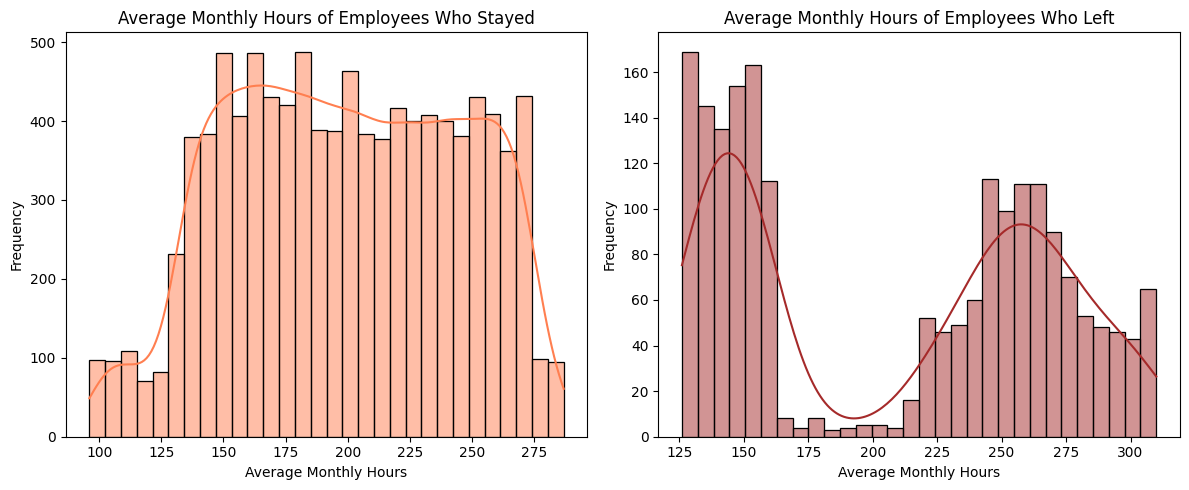

In [64]:
# # Distribution plot of average_montly_hours for left and stayed
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['left'] == 0]['average_montly_hours'], kde=True, bins=30, color='coral')
plt.title('Average Monthly Hours of Employees Who Stayed')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(df[df['left'] == 1]['average_montly_hours'], kde=True, bins=30, color='brown')
plt.title('Average Monthly Hours of Employees Who Left')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

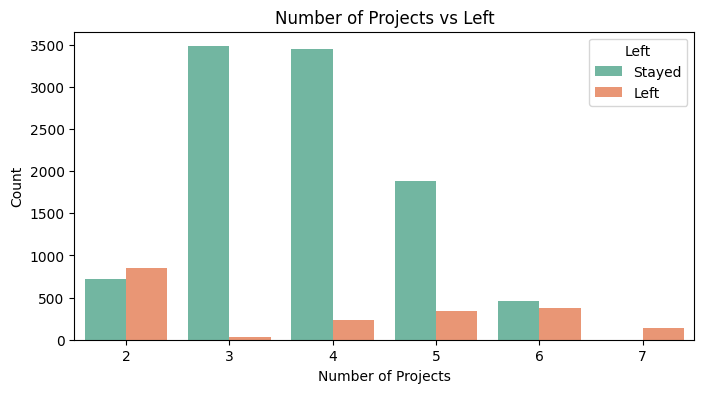

In [65]:
# Bar plot of number_projects vs left
plt.figure(figsize=(8, 4))
sns.countplot(x='number_project', hue='left', data=df, palette='Set2')
plt.title('Number of Projects vs Left')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Left', loc='upper right', labels=['Stayed', 'Left'])
plt.show()

## The factors that influence the most the turnover are, in this order, satisfaction level, Number of years spent in the company, salary.
- Satisfaction level: negative correlation (as expected)
- Number of years spent in the company: positive correlation
- Salary: positive correlation

## We also notice that the large majority employees who leave had a last evaluation below 0.58 or above 0.76. Very few are in between. 

# Clustering

In [66]:
# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
X_kmeans = df[['satisfaction_level', 'last_evaluation', 'left']].values
X_kmeans


array([[0.38, 0.53, 1.  ],
       [0.8 , 0.86, 1.  ],
       [0.11, 0.88, 1.  ],
       ...,
       [0.85, 0.54, 0.  ],
       [0.33, 0.65, 0.  ],
       [0.5 , 0.73, 0.  ]], shape=(11991, 3))

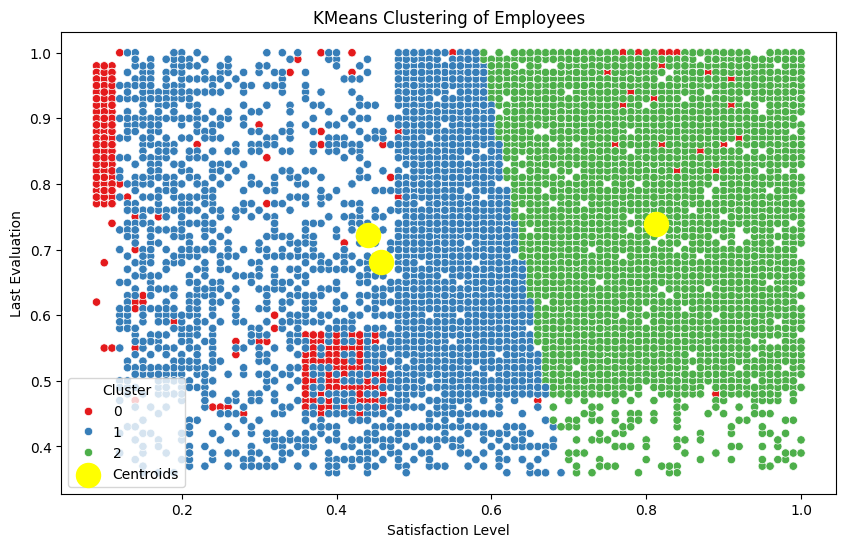

In [67]:
# Building the KMeans model
kmean_model = KMeans(n_clusters = 3, n_init = 10, init = 'k-means++', random_state = 42)
y_kmeans = kmean_model.fit_predict(X_kmeans)
# Adding cluster labels to the original DataFrame
df['cluster'] = y_kmeans
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=df, palette='Set1')
plt.scatter(kmean_model.cluster_centers_[:, 0], kmean_model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clustering of Employees')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.show()

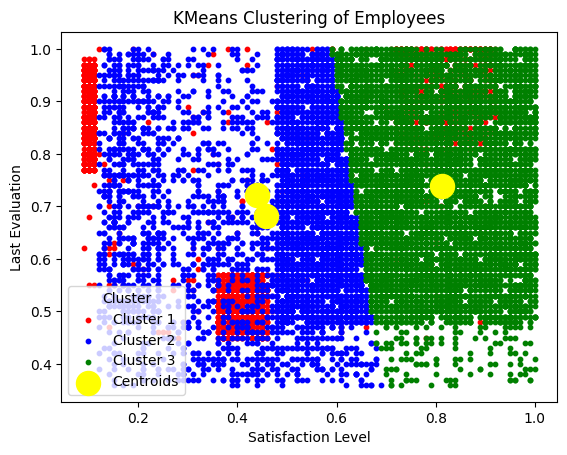

In [68]:
plt.scatter(X_kmeans[y_kmeans == 0, 0], X_kmeans[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_kmeans[y_kmeans == 1, 0], X_kmeans[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_kmeans[y_kmeans == 2, 0], X_kmeans[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmean_model.cluster_centers_[:, 0], kmean_model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clustering of Employees')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.show()

## There are essentially two distinct clusters: employees with a high satisfaction (above ~ 0.7 and employees with a satisfaction (below ~ 0.7). The last evaluation does not segregate the employees from a turnover standpoint.

# Handle the left Class Imbalance using the SMOTE technique

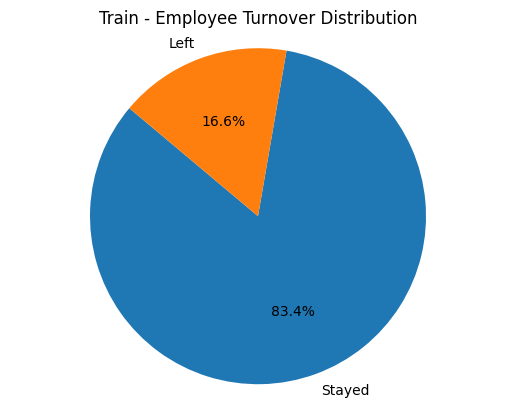

In [69]:
# pie chart of left vs stayed
#plt.figure(figsize=(8, 6))
plt.pie(df['left'].value_counts(), labels=['Stayed', 'Left'], autopct='%1.1f%%', startangle=140)
plt.title('Train - Employee Turnover Distribution')
plt.axis('equal')
plt.show()

In [70]:
# Create train and test sets
from sklearn.model_selection import train_test_split
X = df.drop(columns=['left', 'cluster'])
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [71]:
X_train.shape, y_train.shape

((9592, 17), (9592,))

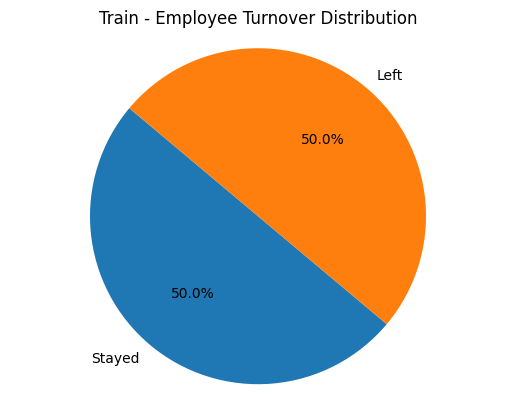

In [72]:
# Handle the left Class Imbalance using the SMOTE technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the distribution of the resampled training set
plt.pie(y_train.value_counts(), labels=['Stayed', 'Left'], autopct='%1.1f%%', startangle=140)
plt.title('Train - Employee Turnover Distribution')
plt.axis('equal')
plt.show()

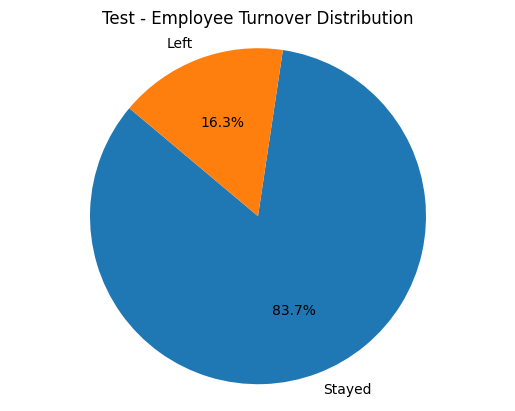

In [73]:
plt.pie(y_test.value_counts(), labels=['Stayed', 'Left'], autopct='%1.1f%%', startangle=140)
plt.title('Test - Employee Turnover Distribution')
plt.axis('equal')
plt.show()

In [74]:
X_train.shape, y_train.shape

((15982, 17), (15982,))

In [75]:
X_test.shape, y_test.shape

((2399, 17), (2399,))

# Perform 5-fold cross-validation model training and evaluate performance

## Define a function to calculate regression models metrics

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import numpy as np

def classification_model_metrics(model, model_name, y_train, y_train_pred, y_test, y_test_pred):
    # Calculate metrics
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_score_train = precision_score(y_train, y_train_pred, average='weighted')
    precision_score_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_score_train = recall_score(y_train, y_train_pred, average='weighted')
    recall_score_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')    

    # Confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    # Predict probabilities for ROC curve
    y_test_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Compute Youden's J statistic for each threshold
    youden_j = tpr - fpr
    optimal_threshold_index = np.argmax(youden_j)
    optimal_threshold = thresholds[optimal_threshold_index]

    # Plot ROC curve with the optimal threshold marked
    plt.figure(figsize=(10, 6))
    #plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    #plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', label="Optimal Threshold")
    plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    #plt.legend()
    plt.legend(loc='lower right')
    plt.show()

    # Create a DataFrame to hold the results
    classification_metrics_df = pd.DataFrame({
        'Model': [model_name],
        'Accuracy (Train)': [accuracy_train],
        'Accuracy (Test)': [accuracy_test],
        'Precision Score (Train)': [precision_score_train],
        'Precision Score (Test)': [precision_score_test],
        'Recall Score (Train)': [recall_score_train],
        'Recall Score (Test)': [recall_score_test],
        'F1 Score (Train)': [f1_train],
        'F1 Score (Test)': [f1_test],
        'AUC': [roc_auc],
        "Youden's J": [youden_j[optimal_threshold_index]],
        "Optimal Threshold Index": [optimal_threshold_index],
        "Optimal Threshold": [optimal_threshold]
    })

    # Print the metrics
    print(classification_metrics_df.T)

    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

    return classification_metrics_df

## Logistic regression

Cross-validation recall scores for Logistic Regression: [0.84230288 0.86178862 0.86045056 0.86107635 0.84355444]
Mean cross-validation recall score for Logistic Regression: 0.8538345696348077


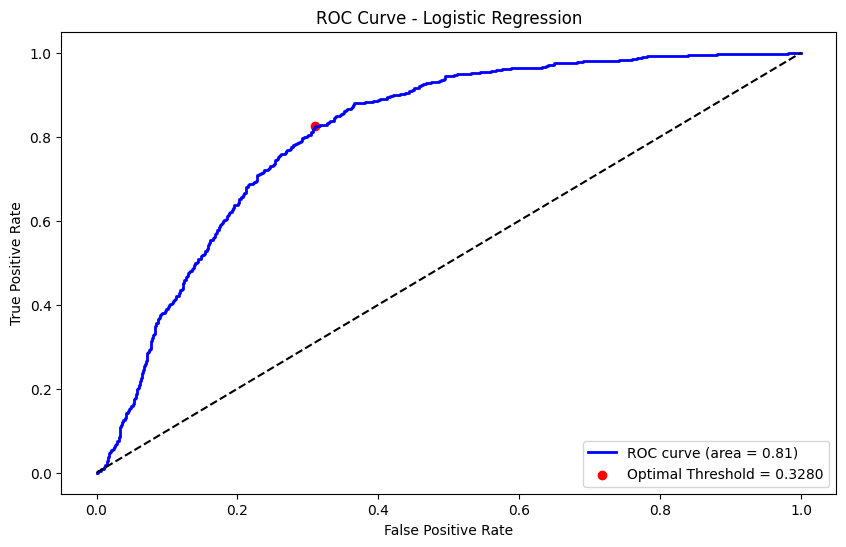

                                           0
Model                    Logistic Regression
Accuracy (Train)                    0.828369
Accuracy (Test)                     0.776574
Precision Score (Train)              0.82924
Precision Score (Test)              0.833008
Recall Score (Train)                0.828369
Recall Score (Test)                 0.776574
F1 Score (Train)                    0.828256
F1 Score (Test)                     0.796477
AUC                                 0.809649
Youden's J                          0.515039
Optimal Threshold Index                  447
Optimal Threshold                   0.328032

Confusion Matrix:
[[1614  395]
 [ 141  249]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      2009
           1       0.39      0.64      0.48       390

    accuracy                           0.78      2399
   macro avg       0.65      0.72      0.67      2399
weighted avg       0.83     

,Model,Accuracy (Train),Accuracy (Test),Precision Score (Train),Precision Score (Test),Recall Score (Train),Recall Score (Test),F1 Score (Train),F1 Score (Test),AUC,Youden's J,Optimal Threshold Index,Optimal Threshold
0,Logistic Regression,0.828369,0.776574,0.82924,0.833008,0.828369,0.776574,0.828256,0.796477,0.809649,0.515039,447,0.328032


In [77]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Apply 5-fold cross-validation to evaluate the model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=123)

# Perform cross-validation to evaluate the model
cross_val_scores_log_reg = cross_val_score(log_reg, X_train, y_train, cv=skf, scoring='recall')

print(f"Cross-validation recall scores for Logistic Regression: {cross_val_scores_log_reg}")
print(f"Mean cross-validation recall score for Logistic Regression: {np.mean(cross_val_scores_log_reg)}")

# Train the model
log_reg.fit(X_train, y_train)
y_train_pred_log = log_reg.predict(X_train)
y_test_pred_log = log_reg.predict(X_test)
log_reg_results_df = classification_model_metrics(log_reg, "Logistic Regression", y_train, y_train_pred_log, y_test, y_test_pred_log)
eval_classification_results_df = log_reg_results_df.copy()
eval_classification_results_df

## Random Forest Classifier

Cross-validation recall scores for Random Forest: [0.95807259 0.96497811 0.94868586 0.94931164 0.96558198]
Mean cross-validation recall score for Random Forest: 0.9573260352801853


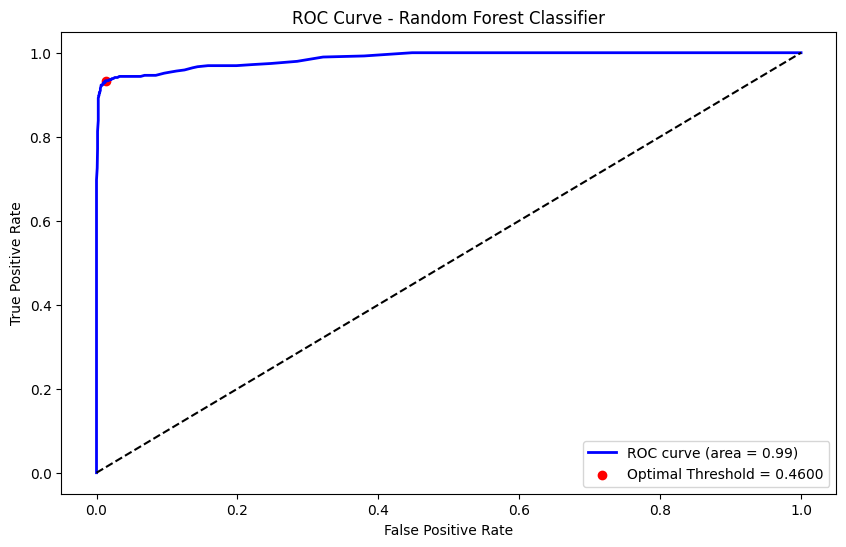

                                                0
Model                    Random Forest Classifier
Accuracy (Train)                              1.0
Accuracy (Test)                          0.979992
Precision Score (Train)                       1.0
Precision Score (Test)                   0.979863
Recall Score (Train)                          1.0
Recall Score (Test)                      0.979992
F1 Score (Train)                              1.0
F1 Score (Test)                          0.979908
AUC                                        0.9866
Youden's J                               0.920392
Optimal Threshold Index                        35
Optimal Threshold                            0.46

Confusion Matrix:
[[1989   20]
 [  28  362]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2009
           1       0.95      0.93      0.94       390

    accuracy                           0.98      2399
   macro avg

,Model,Accuracy (Train),Accuracy (Test),Precision Score (Train),Precision Score (Test),Recall Score (Train),Recall Score (Test),F1 Score (Train),F1 Score (Test),AUC,Youden's J,Optimal Threshold Index,Optimal Threshold
0,Logistic Regression,0.828369,0.776574,0.82924,0.833008,0.828369,0.776574,0.828256,0.796477,0.809649,0.515039,447,0.328032
1,Random Forest Classifier,1.000000,0.979992,1.00000,0.979863,1.000000,0.979992,1.000000,0.979908,0.986600,0.920392,35,0.460000


In [78]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=123)
# Perform cross-validation to evaluate the model
cross_val_scores_rf_classifier = cross_val_score(rf_classifier, X_train, y_train, cv=skf, scoring='recall')
print(f"Cross-validation recall scores for Random Forest: {cross_val_scores_rf_classifier}")
print(f"Mean cross-validation recall score for Random Forest: {np.mean(cross_val_scores_rf_classifier)}")
# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)
y_train_pred_rf_classifier = rf_classifier.predict(X_train)
y_test_pred_rf_classifier = rf_classifier.predict(X_test)
rf_classifier_results_df = classification_model_metrics(rf_classifier, "Random Forest Classifier", y_train, y_train_pred_rf_classifier, y_test, y_test_pred_rf_classifier)
eval_classification_results_df = pd.concat([eval_classification_results_df, rf_classifier_results_df], ignore_index=True)
eval_classification_results_df


## Gradient Boosting Classifier

Cross-validation recall scores for Gradient Boosting: [0.94993742 0.94308943 0.93554443 0.94117647 0.94993742]
Mean cross-validation recall score for Gradient Boosting: 0.943937035115032


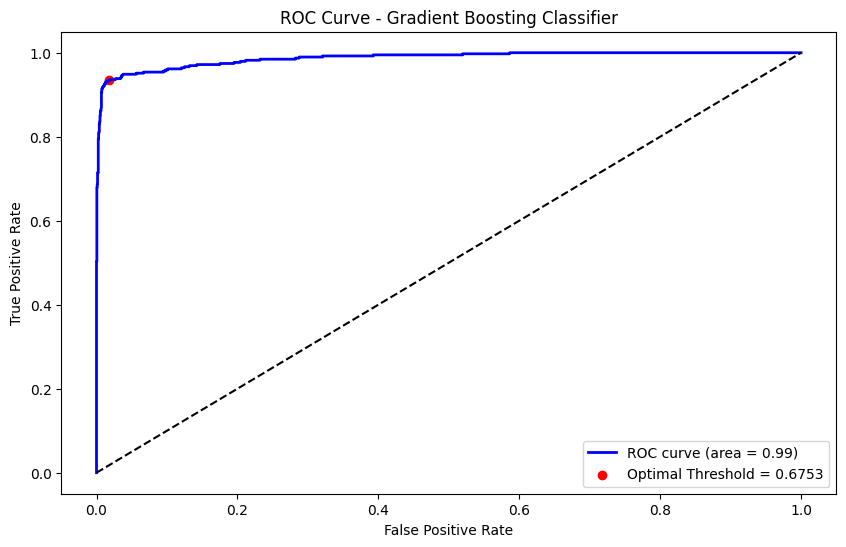

                                                    0
Model                    Gradient Boosting Classifier
Accuracy (Train)                              0.96202
Accuracy (Test)                              0.958733
Precision Score (Train)                      0.962491
Precision Score (Test)                       0.962808
Recall Score (Train)                          0.96202
Recall Score (Test)                          0.958733
F1 Score (Train)                              0.96201
F1 Score (Test)                              0.959876
AUC                                          0.987172
Youden's J                                   0.917978
Optimal Threshold Index                           139
Optimal Threshold                            0.675345

Confusion Matrix:
[[1930   79]
 [  20  370]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2009
           1       0.82      0.95      0.88       390

    accura

,Model,Accuracy (Train),Accuracy (Test),Precision Score (Train),Precision Score (Test),Recall Score (Train),Recall Score (Test),F1 Score (Train),F1 Score (Test),AUC,Youden's J,Optimal Threshold Index,Optimal Threshold
0,Logistic Regression,0.828369,0.776574,0.829240,0.833008,0.828369,0.776574,0.828256,0.796477,0.809649,0.515039,447,0.328032
1,Random Forest Classifier,1.000000,0.979992,1.000000,0.979863,1.000000,0.979992,1.000000,0.979908,0.986600,0.920392,35,0.460000
2,Gradient Boosting Classifier,0.962020,0.958733,0.962491,0.962808,0.962020,0.958733,0.962010,0.959876,0.987172,0.917978,139,0.675345


In [79]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=123)
# Perform cross-validation to evaluate the model
cross_val_scores_gb_classifier = cross_val_score(gb_classifier, X_train, y_train, cv=skf, scoring='recall')
print(f"Cross-validation recall scores for Gradient Boosting: {cross_val_scores_gb_classifier}")
print(f"Mean cross-validation recall score for Gradient Boosting: {np.mean(cross_val_scores_gb_classifier)}")
# Train the Gradient Boosting Classifier
gb_classifier.fit(X_train, y_train)
y_train_pred_gb_classifier = gb_classifier.predict(X_train)
y_test_pred_gb_classifier = gb_classifier.predict(X_test)
gb_classifier_results_df = classification_model_metrics(gb_classifier, "Gradient Boosting Classifier", y_train, y_train_pred_gb_classifier, y_test, y_test_pred_gb_classifier)
eval_classification_results_df = pd.concat([eval_classification_results_df, gb_classifier_results_df], ignore_index=True)
eval_classification_results_df

## The best model is the random forest classifier with the highest AUC. All other metrics are also better compared to the two other models.

## The metric that is important in confusion matrix is Recall because we want to minimize the false negatives (employees who are incorrectly assessed as "stay")

# Retention strategies for targeted employees

In [80]:
# Selected model is the Random Forest Classifier
y_test_pred_rf_classifier_prob = rf_classifier.predict_proba(X_test)[:, 1]

In [81]:
y_test_pred_rf_classifier_prob

array([0.05, 0.13, 0.13, ..., 0.  , 0.32, 0.01], shape=(2399,))

In [82]:
# transform the y_test_pred_rf_classifier_prob to a DataFrame
y_test_pred_rf_classifier_prob_df = pd.DataFrame(y_test_pred_rf_classifier_prob, columns=['probability_of_leaving'])
y_test_pred_rf_classifier_prob_df

,probability_of_leaving
0,0.05
1,0.13
2,0.13
3,0.26
4,0.03
...,...
2394,0.03
2395,0.04
2396,0.00
2397,0.32


In [83]:
# Define the zones based on the probability scores
def categorize_employee(probability):
    if probability < 0.2:
        return 'Safe Zone (Green)'
    elif 0.2 <= probability < 0.6:
        return 'Low-Risk Zone (Yellow)'
    elif 0.6 <= probability < 0.9:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

In [84]:
# Apply the categorization to the predicted probabilities
df['Risk Zone'] = y_test_pred_rf_classifier_prob_df['probability_of_leaving'].apply(categorize_employee)
# Display the distribution of employees across the risk zones
risk_zone_counts = df['Risk Zone'].value_counts()
risk_zone_counts

Risk Zone
Safe Zone (Green)            1861
High-Risk Zone (Red)          337
Low-Risk Zone (Yellow)        157
Medium-Risk Zone (Orange)      35
Name: count, dtype: int64

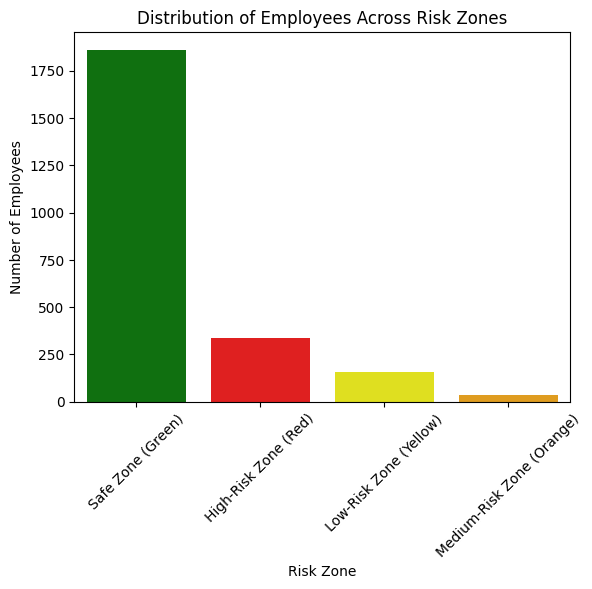

In [85]:
# Plot bar plot of risk zones
sns.barplot(x=risk_zone_counts.index, y=risk_zone_counts.values, hue=risk_zone_counts.index, palette=['green', 'red', 'yellow', 'orange'])
plt.title('Distribution of Employees Across Risk Zones')
plt.xlabel('Risk Zone')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

# Potential retention strategies based on risk zones:
### Safe Zone (Green): Maintain current engagement, implement reward programs
### Low-Risk Zone (Yellow): Career development opportunities, leadership programs
### Medium-Risk Zone (Orange): Increase check-in frequency, open 2-way feedback, address specific concerns
### High-Risk Zone (Red): Meet to discuss concerns, customized retention program